<a href="https://colab.research.google.com/github/Awynimantha/Research-ML-scripts/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
from scipy import signal
import gc as gc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

from google.colab import drive
drive.mount('/content/drive')

file1 = h5py.File("/content/drive/MyDrive/signal data/dataset-benign-latest.h5", "r")
file2 = h5py.File("/content/drive/MyDrive/signal data/test-benign-idle-5.h5", "r")
file3 = h5py.File("/content/drive/MyDrive/signal data/dataset-infected-test.h5", "r")

Num GPUs Available: 1
Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import os
import gc
import scipy.signal as signal  # Ensure signal is properly imported

# Create the new folder if it doesn't exist
output_folder = "/content/drive/MyDrive/spectrograms/test/0"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
keys = file2.keys()
for key in list(keys)[3:9]:
    try:
        signal_data = file2[key]  # Load data
        fig = plt.figure()
        plt.psd(signal_data, NFFT=2048, Fc=12e6, Fs=20e6)
        output_filename = os.path.join(output_folder, f"z5noise-{key}.png")
        fig.savefig(output_filename, dpi=300, format="png", bbox_inches="tight")
        plt.close(fig)  # Close figure to release memory

        print(f"Spectrogram for {key} saved to {output_filename}")

        gc.collect()  # Trigger garbage collection

    except Exception as e:
        print(f"Error processing key {key}: {e}")


In [ ]:
import matplotlib.pyplot as plt
import os
import gc
import scipy.signal as signal  # Ensure signal is properly imported
def add_gaussian_noise(signal, noise_level=0.005):
    real_noise = np.random.normal(0, noise_level, size=signal.shape)
    imag_noise = np.random.normal(0, noise_level, size=signal.shape)
    noisy_signal = signal + (real_noise + 1j * imag_noise)
    return noisy_signal

# Create the new folder if it doesn't exist
output_folder = "/content/drive/MyDrive/spectrograms/test/0"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
keys = file2.keys()
for key in list(keys)[3:9]:
    try:
        signal_data = add_gaussian_noise(file2[key])  # Load data
        fig = plt.figure()
        plt.psd(signal_data, NFFT=2048, Fc=12e6, Fs=20e6)
        output_filename = os.path.join(output_folder, f"z5noise-{key}.png")
        fig.savefig(output_filename, dpi=300, format="png", bbox_inches="tight")
        plt.close(fig)  # Close figure to release memory

        print(f"Spectrogram for {key} saved to {output_filename}")

        gc.collect()  # Trigger garbage collection

    except Exception as e:
        print(f"Error processing key {key}: {e}")


In [ ]:
import matplotlib.pyplot as plt
import os
import gc
import scipy.signal as signal  # Ensure signal is properly imported
def add_gaussian_noise(signal, noise_level=0.005):
    real_noise = np.random.normal(0, noise_level, size=signal.shape)
    imag_noise = np.random.normal(0, noise_level, size=signal.shape)
    noisy_signal = signal + (real_noise + 1j * imag_noise)
    return noisy_signal
MLP.ipynb_
MLP

import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import gc as gc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

from google.colab import drive
drive.mount('/content/drive')

# file1 = h5py.File("/content/drive/MyDrive/signal data/dataset-benign-latest.h5", "r")
# file2 = h5py.File("/content/drive/MyDrive/signal data/dataset-infected-latest.h5", "r")
# file3 = h5py.File("/content/drive/MyDrive/signal data/dataset-infected-test.h5", "r")
# file4 = h5py.File("/content/drive/MyDrive/signal data/test-data-idle.h5", "r")
file1 = h5py.File("/content/drive/MyDrive/signal data/big-benign.h5", "r")
file2 = h5py.File("/content/drive/MyDrive/signal data/big-infected.h5", "r")
file3 = h5py.File("/content/drive/MyDrive/signal data/test-benign-idle-5.h5", "r")
file4 = h5py.File("/content/drive/MyDrive/signal data/test-infected-idle-5.h5", "r")
file5 = h5py.File("/content/drive/MyDrive/signal data/test-data.h5", "r")

file6 = h5py.File("/content/drive/MyDrive/signal data/benign-vm.h5", "r")
file7 = h5py.File("/content/drive/MyDrive/signal data/infected-gamesall.h5", "r")

print(file1.keys())
print(file2.keys())

<KeysViewHDF5 ['benign-idle0', 'benign-idle0_file3', 'benign-idle0_file3_file4', 'benign-idle0_file4', 'benign-idle0_file5', 'benign-idle0_file8', 'benign-idle1', 'benign-idle10', 'benign-idle10_file3', 'benign-idle10_file3_file4', 'benign-idle10_file4', 'benign-idle10_file5', 'benign-idle10_file8', 'benign-idle11', 'benign-idle11_file3', 'benign-idle11_file4', 'benign-idle11_file8', 'benign-idle12', 'benign-idle12_file3', 'benign-idle12_file3_file4', 'benign-idle12_file4', 'benign-idle12_file5', 'benign-idle12_file8', 'benign-idle13', 'benign-idle13_file3', 'benign-idle13_file3_file4', 'benign-idle13_file4', 'benign-idle13_file5', 'benign-idle13_file8', 'benign-idle14', 'benign-idle14_file3', 'benign-idle14_file3_file4', 'benign-idle14_file4', 'benign-idle14_file5', 'benign-idle14_file8', 'benign-idle15', 'benign-idle15_file3', 'benign-idle15_file3_file4', 'benign-idle15_file4', 'benign-idle15_file8', 'benign-idle16', 'benign-idle16_file3', 'benign-idle16_file3_file4', 'benign-idle16_file4', 'benign-idle16_file8', 'benign-idle17', 'benign-idle17_file3', 'benign-idle17_file3_file4', 'benign-idle17_file4', 'benign-idle17_file8', 'benign-idle18', 'benign-idle18_file3', 'benign-idle18_file3_file4', 'benign-idle18_file4', 'benign-idle18_file8', 'benign-idle19', 'benign-idle19_file3', 'benign-idle19_file4', 'benign-idle19_file8', 'benign-idle1_file3', 'benign-idle1_file4', 'benign-idle1_file5', 'benign-idle1_file8', 'benign-idle2', 'benign-idle20', 'benign-idle20_file3', 'benign-idle20_file3_file4', 'benign-idle20_file4', 'benign-idle20_file8', 'benign-idle21', 'benign-idle21_file3', 'benign-idle21_file3_file4', 'benign-idle21_file4', 'benign-idle21_file8', 'benign-idle22', 'benign-idle22_file3', 'benign-idle22_file3_file4', 'benign-idle22_file4', 'benign-idle22_file8', 'benign-idle23', 'benign-idle23_file3', 'benign-idle23_file3_file4', 'benign-idle23_file4', 'benign-idle23_file8', 'benign-idle24', 'benign-idle24_file3', 'benign-idle24_file3_file4', 'benign-idle24_file4', 'benign-idle24_file8', 'benign-idle25', 'benign-idle25_file3', 'benign-idle25_file3_file4', 'benign-idle25_file4', 'benign-idle25_file8', 'benign-idle26', 'benign-idle26_file3', 'benign-idle26_file3_file4', 'benign-idle26_file4', 'benign-idle26_file8', 'benign-idle27', 'benign-idle27_file3', 'benign-idle27_file3_file4', 'benign-idle27_file4', 'benign-idle27_file8', 'benign-idle28', 'benign-idle28_file3', 'benign-idle28_file4', 'benign-idle28_file8', 'benign-idle29', 'benign-idle29_file3', 'benign-idle29_file3_file4', 'benign-idle29_file4', 'benign-idle29_file8', 'benign-idle2_file3', 'benign-idle2_file3_file4', 'benign-idle2_file4', 'benign-idle2_file5', 'benign-idle2_file8', 'benign-idle3', 'benign-idle30', 'benign-idle30_file3', 'benign-idle30_file3_file4', 'benign-idle30_file4', 'benign-idle30_file8', 'benign-idle31', 'benign-idle31_file3', 'benign-idle31_file3_file4', 'benign-idle31_file4', 'benign-idle31_file8', 'benign-idle32', 'benign-idle32_file3', 'benign-idle32_file3_file4', 'benign-idle32_file4', 'benign-idle32_file8', 'benign-idle33', 'benign-idle33_file3', 'benign-idle33_file3_file4', 'benign-idle33_file4', 'benign-idle33_file8', 'benign-idle34', 'benign-idle34_file3', 'benign-idle34_file3_file4', 'benign-idle34_file4', 'benign-idle34_file8', 'benign-idle35', 'benign-idle35_file3', 'benign-idle35_file3_file4', 'benign-idle35_file4', 'benign-idle35_file8', 'benign-idle36', 'benign-idle36_file3', 'benign-idle36_file3_file4', 'benign-idle36_file4', 'benign-idle36_file8', 'benign-idle37', 'benign-idle37_file3', 'benign-idle37_file3_file4', 'benign-idle37_file4', 'benign-idle37_file8', 'benign-idle38', 'benign-idle38_file3', 'benign-idle38_file3_file4', 'benign-idle38_file4', 'benign-idle38_file8', 'benign-idle39', 'benign-idle39_file3', 'benign-idle39_file3_file4', 'benign-idle39_file4', 'benign-idle39_file8', 'benign-idle3_file3', 'benign-idle3_file3_file4', 'benign-idle3_file4', 'benign-idle3_file5', 'benign-idle3_file8', 'benign-idle4', 'benign-idle40', 'benign-idle40_file3', 'benign-idle40_file3_file4', 'benign-idle40_file4', 'benign-idle40_file8', 'benign-idle41', 'benign-idle41_file3', 'benign-idle41_file3_file4', 'benign-idle41_file4', 'benign-idle41_file8', 'benign-idle42', 'benign-idle42_file3', 'benign-idle42_file3_file4', 'benign-idle42_file4', 'benign-idle42_file8', 'benign-idle43', 'benign-idle43_file3', 'benign-idle43_file3_file4', 'benign-idle43_file4', 'benign-idle43_file8', 'benign-idle44', 'benign-idle44_file3', 'benign-idle44_file3_file4', 'benign-idle44_file4', 'benign-idle44_file8', 'benign-idle45', 'benign-idle45_file8', 'benign-idle46', 'benign-idle47', 'benign-idle48', 'benign-idle49', 'benign-idle4_file3', 'benign-idle4_file3_file4', 'benign-idle4_file4', 'benign-idle4_file5', 'benign-idle4_file8', 'benign-idle5', 'benign-idle50', 'benign-idle51', 'benign-idle52', 'benign-idle53', 'benign-idle54', 'benign-idle55', 'benign-idle56', 'benign-idle57', 'benign-idle58', 'benign-idle5_file3', 'benign-idle5_file4', 'benign-idle5_file5', 'benign-idle5_file8', 'benign-idle6', 'benign-idle6_file3', 'benign-idle6_file3_file4', 'benign-idle6_file4', 'benign-idle6_file5', 'benign-idle6_file8', 'benign-idle7', 'benign-idle7_file3', 'benign-idle7_file3_file4', 'benign-idle7_file4', 'benign-idle7_file5', 'benign-idle7_file8', 'benign-idle8', 'benign-idle8_file3', 'benign-idle8_file3_file4', 'benign-idle8_file4', 'benign-idle8_file5', 'benign-idle8_file8', 'benign-idle9', 'benign-idle9_file3', 'benign-idle9_file3_file4', 'benign-idle9_file4', 'benign-idle9_file5', 'benign-idle9_file8']>
<KeysViewHDF5 ['infected-idle0', 'infected-idle0_file10', 'infected-idle0_file11', 'infected-idle0_file12', 'infected-idle0_file8', 'infected-idle0_file8_file10', 'infected-idle1', 'infected-idle10', 'infected-idle10_file10', 'infected-idle10_file11', 'infected-idle10_file12', 'infected-idle10_file8', 'infected-idle10_file8_file10', 'infected-idle11', 'infected-idle11_file10', 'infected-idle11_file11', 'infected-idle11_file12', 'infected-idle11_file8', 'infected-idle11_file8_file10', 'infected-idle12', 'infected-idle12_file10', 'infected-idle12_file11', 'infected-idle12_file12', 'infected-idle12_file8', 'infected-idle12_file8_file10', 'infected-idle13', 'infected-idle13_file10', 'infected-idle13_file11', 'infected-idle13_file12', 'infected-idle13_file8', 'infected-idle13_file8_file10', 'infected-idle14', 'infected-idle14_file10', 'infected-idle14_file12', 'infected-idle14_file8', 'infected-idle14_file8_file10', 'infected-idle15', 'infected-idle15_file10', 'infected-idle15_file12', 'infected-idle15_file8', 'infected-idle15_file8_file10', 'infected-idle16', 'infected-idle16_file10', 'infected-idle16_file12', 'infected-idle16_file8', 'infected-idle16_file8_file10', 'infected-idle17', 'infected-idle17_file10', 'infected-idle17_file12', 'infected-idle17_file8', 'infected-idle17_file8_file10', 'infected-idle18', 'infected-idle18_file10', 'infected-idle18_file12', 'infected-idle18_file8', 'infected-idle18_file8_file10', 'infected-idle19', 'infected-idle19_file10', 'infected-idle19_file12', 'infected-idle19_file8', 'infected-idle1_file10', 'infected-idle1_file11', 'infected-idle1_file12', 'infected-idle1_file8', 'infected-idle2', 'infected-idle20', 'infected-idle20_file10', 'infected-idle20_file12', 'infected-idle20_file8', 'infected-idle20_file8_file10', 'infected-idle21', 'infected-idle21_file10', 'infected-idle21_file12', 'infected-idle21_file8', 'infected-idle21_file8_file10', 'infected-idle22', 'infected-idle22_file10', 'infected-idle22_file12', 'infected-idle22_file8', 'infected-idle22_file8_file10', 'infected-idle23', 'infected-idle23_file10', 'infected-idle23_file12', 'infected-idle23_file8', 'infected-idle23_file8_file10', 'infected-idle24', 'infected-idle24_file10', 'infected-idle24_file12', 'infected-idle24_file8', 'infected-idle24_file8_file10', 'infected-idle25', 'infected-idle25_file10', 'infected-idle25_file12', 'infected-idle25_file8', 'infected-idle25_file8_file10', 'infected-idle26', 'infected-idle26_file10', 'infected-idle26_file12', 'infected-idle26_file8', 'infected-idle26_file8_file10', 'infected-idle27', 'infected-idle27_file10', 'infected-idle27_file12', 'infected-idle27_file8', 'infected-idle27_file8_file10', 'infected-idle28', 'infected-idle28_file10', 'infected-idle28_file12', 'infected-idle28_file8', 'infected-idle28_file8_file10', 'infected-idle29', 'infected-idle29_file10', 'infected-idle29_file12', 'infected-idle29_file8', 'infected-idle29_file8_file10', 'infected-idle2_file10', 'infected-idle2_file11', 'infected-idle2_file12', 'infected-idle2_file8', 'infected-idle2_file8_file10', 'infected-idle3', 'infected-idle30', 'infected-idle30_file10', 'infected-idle30_file12', 'infected-idle30_file8', 'infected-idle30_file8_file10', 'infected-idle31', 'infected-idle31_file10', 'infected-idle31_file12', 'infected-idle31_file8', 'infected-idle31_file8_file10', 'infected-idle32', 'infected-idle32_file10', 'infected-idle32_file12', 'infected-idle32_file8', 'infected-idle32_file8_file10', 'infected-idle33', 'infected-idle33_file10', 'infected-idle33_file12', 'infected-idle33_file8', 'infected-idle33_file8_file10', 'infected-idle34', 'infected-idle34_file10', 'infected-idle34_file12', 'infected-idle34_file8', 'infected-idle34_file8_file10', 'infected-idle35', 'infected-idle35_file10', 'infected-idle35_file12', 'infected-idle35_file8', 'infected-idle35_file8_file10', 'infected-idle36', 'infected-idle36_file10', 'infected-idle36_file12', 'infected-idle36_file8', 'infected-idle37', 'infected-idle37_file10', 'infected-idle37_file12', 'infected-idle37_file8', 'infected-idle37_file8_file10', 'infected-idle38', 'infected-idle38_file10', 'infected-idle38_file12', 'infected-idle38_file8', 'infected-idle38_file8_file10', 'infected-idle39', 'infected-idle39_file10', 'infected-idle39_file12', 'infected-idle39_file8', 'infected-idle39_file8_file10', 'infected-idle3_file10', 'infected-idle3_file11', 'infected-idle3_file12', 'infected-idle3_file8', 'infected-idle3_file8_file10', 'infected-idle4', 'infected-idle40', 'infected-idle40_file10', 'infected-idle40_file12', 'infected-idle40_file8', 'infected-idle40_file8_file10', 'infected-idle41', 'infected-idle41_file10', 'infected-idle41_file12', 'infected-idle41_file8', 'infected-idle41_file8_file10', 'infected-idle42', 'infected-idle42_file10', 'infected-idle42_file8', 'infected-idle42_file8_file10', 'infected-idle43', 'infected-idle43_file10', 'infected-idle43_file12', 'infected-idle43_file8', 'infected-idle44', 'infected-idle44_file10', 'infected-idle44_file12', 'infected-idle44_file8', 'infected-idle44_file8_file10', 'infected-idle45', 'infected-idle45_file10', 'infected-idle45_file12', 'infected-idle45_file8', 'infected-idle46', 'infected-idle46_file10', 'infected-idle46_file12', 'infected-idle46_file8', 'infected-idle47', 'infected-idle47_file12', 'infected-idle47_file8', 'infected-idle48', 'infected-idle49', 'infected-idle4_file10', 'infected-idle4_file11', 'infected-idle4_file12', 'infected-idle4_file8', 'infected-idle4_file8_file10', 'infected-idle5', 'infected-idle50', 'infected-idle51', 'infected-idle52', 'infected-idle53', 'infected-idle54', 'infected-idle55', 'infected-idle56', 'infected-idle57', 'infected-idle58', 'infected-idle59', 'infected-idle5_file10', 'infected-idle5_file11', 'infected-idle5_file12', 'infected-idle5_file8', 'infected-idle5_file8_file10', 'infected-idle6', 'infected-idle60', 'infected-idle61', 'infected-idle62', 'infected-idle63', 'infected-idle6_file10', 'infected-idle6_file11', 'infected-idle6_file12', 'infected-idle6_file8', 'infected-idle6_file8_file10', 'infected-idle7', 'infected-idle7_file10', 'infected-idle7_file11', 'infected-idle7_file12', 'infected-idle7_file8', 'infected-idle8', 'infected-idle8_file10', 'infected-idle8_file11', 'infected-idle8_file12', 'infected-idle8_file8', 'infected-idle8_file8_file10', 'infected-idle9', 'infected-idle9_file10', 'infected-idle9_file11', 'infected-idle9_file12', 'infected-idle9_file8', 'infected-idle9_file8_file10']>

import h5py
import tensorflow as tf
import numpy as np

file1 = h5py.File("/content/drive/MyDrive/signal data/big-benign.h5", "r")
file2 = h5py.File("/content/drive/MyDrive/signal data/big-infected.h5", "r")

def compute_nicv_fixed(num_samples=10):
    """Compute NICV scores for each frequency bin across multiple samples per class."""

    benign_keys = list(file1.keys())
    infected_keys = list(file2.keys())

    # Randomly choose 'num_samples' from each class
    benign_keys = np.random.choice(benign_keys, size=num_samples, replace=False)
    infected_keys = np.random.choice(infected_keys, size=num_samples, replace=False)

    benign_magnitudes = []
    infected_magnitudes = []

    # First: figure out the minimum signal length across all selected samples
    lengths = []
    for key in benign_keys:
        lengths.append(len(file1[key]))
    for key in infected_keys:
        lengths.append(len(file2[key]))
    min_len = min(lengths)

    def compute_stft_magnitude(dataset):
        # Truncate to min_len
        signal = dataset[:min_len]
        tensor = tf.convert_to_tensor(signal, dtype=tf.float32)
        Zxx = tf.signal.stft(tensor, frame_length=4096, frame_step=2048, fft_length=4096)
        return tf.abs(Zxx).numpy()

    # Compute STFT magnitudes
    for key in benign_keys:
        benign_magnitudes.append(compute_stft_magnitude(file1[key]))

    for key in infected_keys:
        infected_magnitudes.append(compute_stft_magnitude(file2[key]))

    benign_magnitudes = np.stack(benign_magnitudes)  # shape: [N, T, F]
    infected_magnitudes = np.stack(infected_magnitudes)  # shape: [N, T, F]

    # Combine and reshape
    all_magnitudes = np.concatenate([benign_magnitudes, infected_magnitudes], axis=0)  # [2N, T, F]

    # NICV is calculated per frequency bin (averaged over time and samples)
    benign_mean_time = benign_magnitudes.mean(axis=1)  # shape: [N, F]
    infected_mean_time = infected_magnitudes.mean(axis=1)  # shape: [N, F]
    combined_mean_time = all_magnitudes.mean(axis=1)  # shape: [2N, F]

    total_variance = np.var(combined_mean_time, axis=0)  # [F]

    benign_class_mean = benign_mean_time.mean(axis=0)  # [F]
    infected_class_mean = infected_mean_time.mean(axis=0)  # [F]
    overall_mean = combined_mean_time.mean(axis=0)  # [F]

    n = benign_mean_time.shape[0]
    between_class_variance = (
        n * (benign_class_mean - overall_mean) ** 2 +
        n * (infected_class_mean - overall_mean) ** 2
    )  # [F]

    nicv_values = between_class_variance / (total_variance + 1e-8)  # [F]

    return nicv_values

nicv_scores = compute_nicv_fixed()
np.save("/content/drive/MyDrive/nicv/(4096,2048)", nicv_scores)

nicv_values = np.load("/content/drive/MyDrive/nicv/(4096,2048).npy")

nicv_scores = nicv_values
n_components = 100

keys =  list(file1.keys())[:100] + list(file2.keys())[0:100] + list(file1.keys())[100:] + list(file2.keys())[100:]
X_batch = []
y_batch = []
for name in keys:
  data = []
  label = 0
  if name in file1:
    label = 0
    data = file1[name]
  else:
    label = 1
    data = file2[name]
  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_batch.append(final_features)
  y_batch.append(label)

/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)

import numpy as np

X_batch_np = np.array(X_batch)
y_batch_np = np.array(y_batch)

# Save to .npy files
np.save('/content/drive/MyDrive/mlp/X_batch.npy', X_batch_np)
np.save('/content/drive/MyDrive/mlp/y_batch.npy', y_batch_np)

(509, 100)
(509,)

Epoch 1/350

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5082 - loss: 2.7383 - val_accuracy: 0.5163 - val_loss: 0.8406
Epoch 2/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5367 - loss: 1.4930 - val_accuracy: 0.8889 - val_loss: 0.6283
Epoch 3/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5356 - loss: 0.9671 - val_accuracy: 0.4837 - val_loss: 0.6965
Epoch 4/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5696 - loss: 0.8323 - val_accuracy: 0.4837 - val_loss: 0.7004
Epoch 5/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5265 - loss: 0.7816 - val_accuracy: 0.4837 - val_loss: 0.6976
Epoch 6/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5467 - loss: 0.7571 - val_accuracy: 0.4837 - val_loss: 0.6976
Epoch 7/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5820 - loss: 0.6906 - val_accuracy: 0.4837 - val_loss: 0.6972
Epoch 8/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5407 - loss: 0.6991 - val_accuracy: 0.4837 - val_loss: 0.6968
Epoch 9/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5104 - loss: 0.7331 - val_accuracy: 0.4837 - val_loss: 0.6961
Epoch 10/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5853 - loss: 0.6947 - val_accuracy: 0.4837 - val_loss: 0.6964
Epoch 11/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4656 - loss: 0.7465 - val_accuracy: 0.4837 - val_loss: 0.6959
Epoch 12/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5452 - loss: 0.6938 - val_accuracy: 0.4837 - val_loss: 0.6954
Epoch 13/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5658 - loss: 0.6945 - val_accuracy: 0.4837 - val_loss: 0.6952
Epoch 14/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5857 - loss: 0.6797 - val_accuracy: 0.4837 - val_loss: 0.6954
Epoch 15/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5415 - loss: 0.7069 - val_accuracy: 0.4837 - val_loss: 0.6954
Epoch 16/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5702 - loss: 0.6851 - val_accuracy: 0.4837 - val_loss: 0.6954
Epoch 17/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5853 - loss: 0.6818 - val_accuracy: 0.4837 - val_loss: 0.6955
Epoch 18/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5553 - loss: 0.6925 - val_accuracy: 0.4837 - val_loss: 0.6954
Epoch 19/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5578 - loss: 0.6782 - val_accuracy: 0.4837 - val_loss: 0.6956
Epoch 20/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5837 - loss: 0.6755 - val_accuracy: 0.4837 - val_loss: 0.6958
Epoch 21/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5110 - loss: 0.6871 - val_accuracy: 0.4837 - val_loss: 0.6957
Epoch 22/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5557 - loss: 0.6852 - val_accuracy: 0.4837 - val_loss: 0.6958
Epoch 23/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6444 - loss: 0.6516 - val_accuracy: 0.4837 - val_loss: 0.6960
Epoch 24/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5577 - loss: 0.6741 - val_accuracy: 0.4837 - val_loss: 0.6960
Epoch 25/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6115 - loss: 0.6615 - val_accuracy: 0.4837 - val_loss: 0.6958
Epoch 26/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6276 - loss: 0.6439 - val_accuracy: 0.4837 - val_loss: 0.6962
Epoch 27/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5896 - loss: 0.6660 - val_accuracy: 0.4837 - val_loss: 0.6962
Epoch 28/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6072 - loss: 0.6650 - val_accuracy: 0.4837 - val_loss: 0.6965
Epoch 29/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5998 - loss: 0.6665 - val_accuracy: 0.4837 - val_loss: 0.6968
Epoch 30/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5787 - loss: 0.6663 - val_accuracy: 0.4837 - val_loss: 0.6969
Epoch 31/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5841 - loss: 0.6429 - val_accuracy: 0.4837 - val_loss: 0.6972
Epoch 32/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5859 - loss: 0.6381 - val_accuracy: 0.4837 - val_loss: 0.6973
Epoch 33/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6736 - loss: 0.6220 - val_accuracy: 0.4837 - val_loss: 0.6964
Epoch 34/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6112 - loss: 0.6661 - val_accuracy: 0.4837 - val_loss: 0.6979
Epoch 35/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6725 - loss: 0.6334 - val_accuracy: 0.4837 - val_loss: 0.6889
Epoch 36/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6358 - loss: 0.6348 - val_accuracy: 0.8170 - val_loss: 0.6461
Epoch 37/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6522 - loss: 0.6202 - val_accuracy: 0.8235 - val_loss: 0.6229
Epoch 38/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6488 - loss: 0.6265 - val_accuracy: 0.8693 - val_loss: 0.5641
Epoch 39/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7145 - loss: 0.5956 - val_accuracy: 0.8824 - val_loss: 0.5039
Epoch 40/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7585 - loss: 0.5747 - val_accuracy: 0.8824 - val_loss: 0.4773
Epoch 41/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7823 - loss: 0.5564 - val_accuracy: 0.8824 - val_loss: 0.4643
Epoch 42/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7763 - loss: 0.5305 - val_accuracy: 0.8824 - val_loss: 0.4524
Epoch 43/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8163 - loss: 0.5141 - val_accuracy: 0.8889 - val_loss: 0.4383
Epoch 44/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7590 - loss: 0.5308 - val_accuracy: 0.8889 - val_loss: 0.4219
Epoch 45/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7104 - loss: 0.5410 - val_accuracy: 0.8824 - val_loss: 0.4116
Epoch 46/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7841 - loss: 0.5224 - val_accuracy: 0.8889 - val_loss: 0.3980
Epoch 47/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7771 - loss: 0.4947 - val_accuracy: 0.8889 - val_loss: 0.3910
Epoch 48/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8094 - loss: 0.4906 - val_accuracy: 0.8889 - val_loss: 0.3902
Epoch 49/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8149 - loss: 0.4916 - val_accuracy: 0.8824 - val_loss: 0.3801
Epoch 50/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7670 - loss: 0.5203 - val_accuracy: 0.8889 - val_loss: 0.3718
Epoch 51/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8541 - loss: 0.4469 - val_accuracy: 0.8889 - val_loss: 0.3635
Epoch 52/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8400 - loss: 0.4421 - val_accuracy: 0.8824 - val_loss: 0.3605
Epoch 53/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7935 - loss: 0.4781 - val_accuracy: 0.8889 - val_loss: 0.3531
Epoch 54/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8097 - loss: 0.4706 - val_accuracy: 0.8824 - val_loss: 0.3520
Epoch 55/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8426 - loss: 0.4615 - val_accuracy: 0.8824 - val_loss: 0.3499
Epoch 56/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8659 - loss: 0.3904 - val_accuracy: 0.8824 - val_loss: 0.3470
Epoch 57/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8455 - loss: 0.4257 - val_accuracy: 0.8824 - val_loss: 0.3436
Epoch 58/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8640 - loss: 0.3862 - val_accuracy: 0.8824 - val_loss: 0.3403
Epoch 59/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8263 - loss: 0.4386 - val_accuracy: 0.8824 - val_loss: 0.3373
Epoch 60/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8219 - loss: 0.4384 - val_accuracy: 0.8889 - val_loss: 0.3336
Epoch 61/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8318 - loss: 0.4150 - val_accuracy: 0.8889 - val_loss: 0.3331
Epoch 62/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8605 - loss: 0.3906 - val_accuracy: 0.8889 - val_loss: 0.3287
Epoch 63/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8003 - loss: 0.4365 - val_accuracy: 0.8889 - val_loss: 0.3267
Epoch 64/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8510 - loss: 0.3981 - val_accuracy: 0.8889 - val_loss: 0.3248
Epoch 65/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8157 - loss: 0.4292 - val_accuracy: 0.8889 - val_loss: 0.3220
Epoch 66/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8486 - loss: 0.4007 - val_accuracy: 0.8889 - val_loss: 0.3196
Epoch 67/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8622 - loss: 0.3837 - val_accuracy: 0.8889 - val_loss: 0.3181
Epoch 68/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8741 - loss: 0.3732 - val_accuracy: 0.8889 - val_loss: 0.3178
Epoch 69/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8417 - loss: 0.3767 - val_accuracy: 0.8889 - val_loss: 0.3158
Epoch 70/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8524 - loss: 0.3892 - val_accuracy: 0.8889 - val_loss: 0.3120
Epoch 71/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8539 - loss: 0.3670 - val_accuracy: 0.8889 - val_loss: 0.3099
Epoch 72/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8584 - loss: 0.3821 - val_accuracy: 0.8889 - val_loss: 0.3077
Epoch 73/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8288 - loss: 0.3931 - val_accuracy: 0.8889 - val_loss: 0.3074
Epoch 74/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8619 - loss: 0.3661 - val_accuracy: 0.8889 - val_loss: 0.3046
Epoch 75/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8495 - loss: 0.3767 - val_accuracy: 0.8889 - val_loss: 0.3034
Epoch 76/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8428 - loss: 0.3644 - val_accuracy: 0.8889 - val_loss: 0.3015
Epoch 77/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8081 - loss: 0.4127 - val_accuracy: 0.8889 - val_loss: 0.3015
Epoch 78/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8602 - loss: 0.3500 - val_accuracy: 0.8824 - val_loss: 0.3027
Epoch 79/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8266 - loss: 0.3949 - val_accuracy: 0.8889 - val_loss: 0.3069
Epoch 80/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8723 - loss: 0.3377 - val_accuracy: 0.8889 - val_loss: 0.3018
Epoch 81/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8549 - loss: 0.3599 - val_accuracy: 0.8889 - val_loss: 0.2964
Epoch 82/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8570 - loss: 0.3747 - val_accuracy: 0.8889 - val_loss: 0.2933
Epoch 83/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8553 - loss: 0.3536 - val_accuracy: 0.8889 - val_loss: 0.2894
Epoch 84/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8423 - loss: 0.3846 - val_accuracy: 0.8889 - val_loss: 0.2917
Epoch 85/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8744 - loss: 0.3187 - val_accuracy: 0.8889 - val_loss: 0.2914
Epoch 86/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8631 - loss: 0.3657 - val_accuracy: 0.8889 - val_loss: 0.2913
Epoch 87/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8877 - loss: 0.3130 - val_accuracy: 0.8889 - val_loss: 0.2842
Epoch 88/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8690 - loss: 0.3534 - val_accuracy: 0.8889 - val_loss: 0.2868
Epoch 89/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8650 - loss: 0.3466 - val_accuracy: 0.8889 - val_loss: 0.2878
Epoch 90/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8443 - loss: 0.3609 - val_accuracy: 0.8889 - val_loss: 0.2858
Epoch 91/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8354 - loss: 0.3767 - val_accuracy: 0.8889 - val_loss: 0.2862
Epoch 92/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8686 - loss: 0.3231 - val_accuracy: 0.8889 - val_loss: 0.2779
Epoch 93/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8682 - loss: 0.3423 - val_accuracy: 0.8889 - val_loss: 0.2785
Epoch 94/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8463 - loss: 0.3674 - val_accuracy: 0.8889 - val_loss: 0.2876
Epoch 95/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8644 - loss: 0.3497 - val_accuracy: 0.8889 - val_loss: 0.2804
Epoch 96/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8757 - loss: 0.3045 - val_accuracy: 0.8889 - val_loss: 0.2769
Epoch 97/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8474 - loss: 0.3844 - val_accuracy: 0.8889 - val_loss: 0.2743
Epoch 98/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8417 - loss: 0.3758 - val_accuracy: 0.8889 - val_loss: 0.2815
Epoch 99/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8586 - loss: 0.3414 - val_accuracy: 0.8889 - val_loss: 0.2762
Epoch 100/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8603 - loss: 0.3508 - val_accuracy: 0.8889 - val_loss: 0.2895
Epoch 101/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8626 - loss: 0.3356 - val_accuracy: 0.8889 - val_loss: 0.2750
Epoch 102/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8625 - loss: 0.3462 - val_accuracy: 0.8889 - val_loss: 0.2782
Epoch 103/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8732 - loss: 0.3169 - val_accuracy: 0.8889 - val_loss: 0.2782
Epoch 104/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8441 - loss: 0.3686 - val_accuracy: 0.8889 - val_loss: 0.2791
Epoch 105/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8308 - loss: 0.3647 - val_accuracy: 0.8954 - val_loss: 0.2773
Epoch 106/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8467 - loss: 0.3664 - val_accuracy: 0.8889 - val_loss: 0.2770
Epoch 107/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8665 - loss: 0.3491 - val_accuracy: 0.8889 - val_loss: 0.2782
Epoch 108/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8501 - loss: 0.3525 - val_accuracy: 0.8889 - val_loss: 0.2721
Epoch 109/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8611 - loss: 0.3397 - val_accuracy: 0.8889 - val_loss: 0.2713
Epoch 110/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8764 - loss: 0.3148 - val_accuracy: 0.8889 - val_loss: 0.2705
Epoch 111/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8725 - loss: 0.3419 - val_accuracy: 0.8889 - val_loss: 0.2731
Epoch 112/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8394 - loss: 0.3639 - val_accuracy: 0.8889 - val_loss: 0.2772
Epoch 113/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8626 - loss: 0.3279 - val_accuracy: 0.8954 - val_loss: 0.2662
Epoch 114/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8549 - loss: 0.3271 - val_accuracy: 0.8954 - val_loss: 0.2629
Epoch 115/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8543 - loss: 0.3519 - val_accuracy: 0.8889 - val_loss: 0.2706
Epoch 116/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8623 - loss: 0.3392 - val_accuracy: 0.8954 - val_loss: 0.2642
Epoch 117/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8637 - loss: 0.3375 - val_accuracy: 0.8889 - val_loss: 0.2719
Epoch 118/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8821 - loss: 0.2978 - val_accuracy: 0.8954 - val_loss: 0.2630
Epoch 119/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8812 - loss: 0.3124 - val_accuracy: 0.8954 - val_loss: 0.2618
Epoch 120/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9013 - loss: 0.2845 - val_accuracy: 0.8954 - val_loss: 0.2595
Epoch 121/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8389 - loss: 0.3559 - val_accuracy: 0.8954 - val_loss: 0.2699
Epoch 122/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8635 - loss: 0.3392 - val_accuracy: 0.8954 - val_loss: 0.2679
Epoch 123/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8406 - loss: 0.3656 - val_accuracy: 0.8889 - val_loss: 0.2769
Epoch 124/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8396 - loss: 0.3435 - val_accuracy: 0.8954 - val_loss: 0.2643
Epoch 125/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9061 - loss: 0.2841 - val_accuracy: 0.8954 - val_loss: 0.2632
Epoch 126/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9189 - loss: 0.2771 - val_accuracy: 0.9020 - val_loss: 0.2583
Epoch 127/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8566 - loss: 0.3553 - val_accuracy: 0.8954 - val_loss: 0.2673
Epoch 128/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9069 - loss: 0.2951 - val_accuracy: 0.8954 - val_loss: 0.2673
Epoch 129/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8737 - loss: 0.3166 - val_accuracy: 0.8954 - val_loss: 0.2652
Epoch 130/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8549 - loss: 0.3500 - val_accuracy: 0.8954 - val_loss: 0.2617
Epoch 131/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8658 - loss: 0.3247 - val_accuracy: 0.8954 - val_loss: 0.2679
Epoch 132/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8927 - loss: 0.3027 - val_accuracy: 0.9020 - val_loss: 0.2568
Epoch 133/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8720 - loss: 0.3365 - val_accuracy: 0.8954 - val_loss: 0.2624
Epoch 134/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8864 - loss: 0.2934 - val_accuracy: 0.8954 - val_loss: 0.2698
Epoch 135/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8677 - loss: 0.3123 - val_accuracy: 0.8889 - val_loss: 0.2711
Epoch 136/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8787 - loss: 0.3229 - val_accuracy: 0.8954 - val_loss: 0.2646
Epoch 137/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8529 - loss: 0.3465 - val_accuracy: 0.9020 - val_loss: 0.2582
Epoch 138/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8730 - loss: 0.3241 - val_accuracy: 0.8954 - val_loss: 0.2627
Epoch 139/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9081 - loss: 0.2561 - val_accuracy: 0.8954 - val_loss: 0.2570
Epoch 140/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8873 - loss: 0.2958 - val_accuracy: 0.8954 - val_loss: 0.2635
Epoch 141/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8756 - loss: 0.3288 - val_accuracy: 0.8954 - val_loss: 0.2689
Epoch 142/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8657 - loss: 0.3293 - val_accuracy: 0.9020 - val_loss: 0.2573
Epoch 143/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8851 - loss: 0.2967 - val_accuracy: 0.9020 - val_loss: 0.2594
Epoch 144/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8925 - loss: 0.2864 - val_accuracy: 0.8954 - val_loss: 0.2644
Epoch 145/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8865 - loss: 0.2760 - val_accuracy: 0.9020 - val_loss: 0.2727
Epoch 146/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8783 - loss: 0.3167 - val_accuracy: 0.8954 - val_loss: 0.2602
Epoch 147/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8945 - loss: 0.2778 - val_accuracy: 0.9020 - val_loss: 0.2546
Epoch 148/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8547 - loss: 0.3176 - val_accuracy: 0.9020 - val_loss: 0.2526
Epoch 149/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8508 - loss: 0.3530 - val_accuracy: 0.9020 - val_loss: 0.2566
Epoch 150/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8481 - loss: 0.3493 - val_accuracy: 0.8954 - val_loss: 0.2651
Epoch 151/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8553 - loss: 0.3520 - val_accuracy: 0.8954 - val_loss: 0.2634
Epoch 152/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8701 - loss: 0.3184 - val_accuracy: 0.9020 - val_loss: 0.2517
Epoch 153/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8449 - loss: 0.3909 - val_accuracy: 0.8954 - val_loss: 0.2623
Epoch 154/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8730 - loss: 0.3265 - val_accuracy: 0.9020 - val_loss: 0.2515
Epoch 155/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8721 - loss: 0.3321 - val_accuracy: 0.8954 - val_loss: 0.2606
Epoch 156/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8642 - loss: 0.3302 - val_accuracy: 0.8954 - val_loss: 0.2654
Epoch 157/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8754 - loss: 0.3218 - val_accuracy: 0.8954 - val_loss: 0.2635
Epoch 158/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8490 - loss: 0.3403 - val_accuracy: 0.8954 - val_loss: 0.2677
Epoch 159/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8655 - loss: 0.3320 - val_accuracy: 0.8954 - val_loss: 0.2584
Epoch 160/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8837 - loss: 0.3047 - val_accuracy: 0.9020 - val_loss: 0.2554
Epoch 161/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8535 - loss: 0.3408 - val_accuracy: 0.8954 - val_loss: 0.2709
Epoch 162/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8626 - loss: 0.3230 - val_accuracy: 0.8954 - val_loss: 0.2612
Epoch 163/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9040 - loss: 0.2810 - val_accuracy: 0.8954 - val_loss: 0.2609
Epoch 164/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8622 - loss: 0.3070 - val_accuracy: 0.9020 - val_loss: 0.2564
Epoch 165/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8853 - loss: 0.2972 - val_accuracy: 0.8954 - val_loss: 0.2615
Epoch 166/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8617 - loss: 0.3378 - val_accuracy: 0.8954 - val_loss: 0.2665
Epoch 167/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8356 - loss: 0.3745 - val_accuracy: 0.8889 - val_loss: 0.2721
Epoch 168/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8701 - loss: 0.3115 - val_accuracy: 0.8889 - val_loss: 0.2752
Epoch 169/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8508 - loss: 0.3411 - val_accuracy: 0.8954 - val_loss: 0.2569
Epoch 170/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8936 - loss: 0.2996 - val_accuracy: 0.8954 - val_loss: 0.2664
Epoch 171/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8651 - loss: 0.3298 - val_accuracy: 0.8954 - val_loss: 0.2572
Epoch 172/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8745 - loss: 0.3266 - val_accuracy: 0.8954 - val_loss: 0.2593
Epoch 173/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8381 - loss: 0.3636 - val_accuracy: 0.8954 - val_loss: 0.2675
Epoch 174/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8747 - loss: 0.3129 - val_accuracy: 0.8954 - val_loss: 0.2659
Epoch 175/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8387 - loss: 0.3458 - val_accuracy: 0.8889 - val_loss: 0.2696
Epoch 176/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8704 - loss: 0.3191 - val_accuracy: 0.8954 - val_loss: 0.2624
Epoch 177/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8535 - loss: 0.3411 - val_accuracy: 0.8954 - val_loss: 0.2612
Epoch 178/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8640 - loss: 0.3220 - val_accuracy: 0.8954 - val_loss: 0.2631
Epoch 179/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8816 - loss: 0.3102 - val_accuracy: 0.8954 - val_loss: 0.2656
Epoch 180/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8728 - loss: 0.3075 - val_accuracy: 0.8954 - val_loss: 0.2562
Epoch 181/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8589 - loss: 0.3441 - val_accuracy: 0.8954 - val_loss: 0.2670
Epoch 182/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8548 - loss: 0.3232 - val_accuracy: 0.8954 - val_loss: 0.2599
Epoch 183/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8952 - loss: 0.2862 - val_accuracy: 0.8954 - val_loss: 0.2631
Epoch 184/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8828 - loss: 0.3053 - val_accuracy: 0.8954 - val_loss: 0.2637
Epoch 185/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8621 - loss: 0.3330 - val_accuracy: 0.8954 - val_loss: 0.2555
Epoch 186/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8665 - loss: 0.3263 - val_accuracy: 0.8954 - val_loss: 0.2565
Epoch 187/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8398 - loss: 0.3686 - val_accuracy: 0.8889 - val_loss: 0.2697
Epoch 188/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8430 - loss: 0.3535 - val_accuracy: 0.8954 - val_loss: 0.2572
Epoch 189/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9032 - loss: 0.2712 - val_accuracy: 0.8954 - val_loss: 0.2613
Epoch 190/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8576 - loss: 0.3289 - val_accuracy: 0.9020 - val_loss: 0.2528
Epoch 191/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8617 - loss: 0.3411 - val_accuracy: 0.8954 - val_loss: 0.2608
Epoch 192/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8739 - loss: 0.3179 - val_accuracy: 0.8954 - val_loss: 0.2580
Epoch 193/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8905 - loss: 0.2816 - val_accuracy: 0.8954 - val_loss: 0.2589
Epoch 194/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8448 - loss: 0.3532 - val_accuracy: 0.8954 - val_loss: 0.2624
Epoch 195/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8388 - loss: 0.3602 - val_accuracy: 0.8954 - val_loss: 0.2639
Epoch 196/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8583 - loss: 0.3176 - val_accuracy: 0.8954 - val_loss: 0.2649
Epoch 197/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8803 - loss: 0.2980 - val_accuracy: 0.8954 - val_loss: 0.2590
Epoch 198/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8730 - loss: 0.3207 - val_accuracy: 0.8954 - val_loss: 0.2564
Epoch 199/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8715 - loss: 0.3140 - val_accuracy: 0.8954 - val_loss: 0.2537
Epoch 200/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8505 - loss: 0.3569 - val_accuracy: 0.8954 - val_loss: 0.2598
Epoch 201/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8960 - loss: 0.2845 - val_accuracy: 0.8954 - val_loss: 0.2577
Epoch 202/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8774 - loss: 0.3230 - val_accuracy: 0.8954 - val_loss: 0.2571
Epoch 203/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8881 - loss: 0.3028 - val_accuracy: 0.8954 - val_loss: 0.2548
Epoch 204/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8537 - loss: 0.3377 - val_accuracy: 0.9020 - val_loss: 0.2534
Epoch 205/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8291 - loss: 0.3859 - val_accuracy: 0.8954 - val_loss: 0.2553
Epoch 206/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8812 - loss: 0.3237 - val_accuracy: 0.8954 - val_loss: 0.2608
Epoch 207/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8573 - loss: 0.3291 - val_accuracy: 0.8954 - val_loss: 0.2568
Epoch 208/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8485 - loss: 0.3585 - val_accuracy: 0.8954 - val_loss: 0.2530
Epoch 209/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8599 - loss: 0.3184 - val_accuracy: 0.8954 - val_loss: 0.2602
Epoch 210/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8411 - loss: 0.3653 - val_accuracy: 0.8954 - val_loss: 0.2548
Epoch 211/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8329 - loss: 0.3994 - val_accuracy: 0.8954 - val_loss: 0.2629
Epoch 212/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8692 - loss: 0.3422 - val_accuracy: 0.8954 - val_loss: 0.2566
Epoch 213/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8572 - loss: 0.3485 - val_accuracy: 0.8954 - val_loss: 0.2641
Epoch 214/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8582 - loss: 0.3330 - val_accuracy: 0.8954 - val_loss: 0.2611
Epoch 215/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8991 - loss: 0.2796 - val_accuracy: 0.8954 - val_loss: 0.2564
Epoch 216/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8521 - loss: 0.3546 - val_accuracy: 0.8954 - val_loss: 0.2573
Epoch 217/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8579 - loss: 0.3364 - val_accuracy: 0.8954 - val_loss: 0.2585
Epoch 218/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8648 - loss: 0.3382 - val_accuracy: 0.8954 - val_loss: 0.2606
Epoch 219/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9006 - loss: 0.2913 - val_accuracy: 0.8954 - val_loss: 0.2574
Epoch 220/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8876 - loss: 0.2885 - val_accuracy: 0.8954 - val_loss: 0.2602
Epoch 221/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8404 - loss: 0.3738 - val_accuracy: 0.8824 - val_loss: 0.2786
Epoch 222/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8768 - loss: 0.3110 - val_accuracy: 0.8889 - val_loss: 0.2750
Epoch 223/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8956 - loss: 0.2805 - val_accuracy: 0.8954 - val_loss: 0.2592
Epoch 224/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8484 - loss: 0.3502 - val_accuracy: 0.8954 - val_loss: 0.2567
Epoch 225/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8743 - loss: 0.3090 - val_accuracy: 0.8954 - val_loss: 0.2591
Epoch 226/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8532 - loss: 0.3693 - val_accuracy: 0.8954 - val_loss: 0.2585
Epoch 227/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8195 - loss: 0.3931 - val_accuracy: 0.8954 - val_loss: 0.2555
Epoch 228/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9025 - loss: 0.2882 - val_accuracy: 0.8954 - val_loss: 0.2589
Epoch 229/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8318 - loss: 0.3789 - val_accuracy: 0.8954 - val_loss: 0.2570
Epoch 230/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8351 - loss: 0.3633 - val_accuracy: 0.8889 - val_loss: 0.2696
Epoch 231/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8811 - loss: 0.3059 - val_accuracy: 0.8954 - val_loss: 0.2545
Epoch 232/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8713 - loss: 0.3055 - val_accuracy: 0.8954 - val_loss: 0.2591
Epoch 233/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8605 - loss: 0.3270 - val_accuracy: 0.8954 - val_loss: 0.2581
Epoch 234/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8700 - loss: 0.3034 - val_accuracy: 0.8954 - val_loss: 0.2664
Epoch 235/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8592 - loss: 0.3207 - val_accuracy: 0.8954 - val_loss: 0.2599
Epoch 236/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8186 - loss: 0.3931 - val_accuracy: 0.8889 - val_loss: 0.2732
Epoch 237/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8568 - loss: 0.3398 - val_accuracy: 0.8954 - val_loss: 0.2575
Epoch 238/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8693 - loss: 0.3022 - val_accuracy: 0.8954 - val_loss: 0.2780
Epoch 239/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8895 - loss: 0.2993 - val_accuracy: 0.8954 - val_loss: 0.2539
Epoch 240/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8399 - loss: 0.3690 - val_accuracy: 0.8889 - val_loss: 0.2648
Epoch 241/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8716 - loss: 0.3260 - val_accuracy: 0.8889 - val_loss: 0.2646
Epoch 242/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8903 - loss: 0.2905 - val_accuracy: 0.8889 - val_loss: 0.2647
Epoch 243/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8578 - loss: 0.3286 - val_accuracy: 0.8954 - val_loss: 0.2537
Epoch 244/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8510 - loss: 0.3380 - val_accuracy: 0.8954 - val_loss: 0.2571
Epoch 245/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8764 - loss: 0.2974 - val_accuracy: 0.8954 - val_loss: 0.2577
Epoch 246/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8799 - loss: 0.3069 - val_accuracy: 0.8954 - val_loss: 0.2566
Epoch 247/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8766 - loss: 0.3063 - val_accuracy: 0.8954 - val_loss: 0.2620
Epoch 248/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8389 - loss: 0.3663 - val_accuracy: 0.8954 - val_loss: 0.2596
Epoch 249/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8742 - loss: 0.3223 - val_accuracy: 0.8954 - val_loss: 0.2623
Epoch 250/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8557 - loss: 0.3350 - val_accuracy: 0.8954 - val_loss: 0.2638
Epoch 251/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8084 - loss: 0.4014 - val_accuracy: 0.8954 - val_loss: 0.2596
Epoch 252/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8393 - loss: 0.3426 - val_accuracy: 0.8954 - val_loss: 0.2629
Epoch 253/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8754 - loss: 0.3152 - val_accuracy: 0.8954 - val_loss: 0.2541
Epoch 254/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8372 - loss: 0.3675 - val_accuracy: 0.8954 - val_loss: 0.2554
Epoch 255/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8736 - loss: 0.3093 - val_accuracy: 0.8954 - val_loss: 0.2613
Epoch 256/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8852 - loss: 0.2989 - val_accuracy: 0.8954 - val_loss: 0.2533
Epoch 257/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8800 - loss: 0.3016 - val_accuracy: 0.8954 - val_loss: 0.2649
Epoch 258/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8726 - loss: 0.3133 - val_accuracy: 0.8954 - val_loss: 0.2545
Epoch 259/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8219 - loss: 0.3838 - val_accuracy: 0.8954 - val_loss: 0.2617
Epoch 260/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8717 - loss: 0.3219 - val_accuracy: 0.8954 - val_loss: 0.2603
Epoch 261/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8797 - loss: 0.3038 - val_accuracy: 0.8954 - val_loss: 0.2581
Epoch 262/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8982 - loss: 0.2852 - val_accuracy: 0.8954 - val_loss: 0.2514
Epoch 263/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8755 - loss: 0.3232 - val_accuracy: 0.8954 - val_loss: 0.2619
Epoch 264/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8594 - loss: 0.3387 - val_accuracy: 0.8954 - val_loss: 0.2554
Epoch 265/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8688 - loss: 0.3098 - val_accuracy: 0.9020 - val_loss: 0.2516
Epoch 266/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8299 - loss: 0.3837 - val_accuracy: 0.8954 - val_loss: 0.2546
Epoch 267/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8861 - loss: 0.2863 - val_accuracy: 0.8954 - val_loss: 0.2536
Epoch 268/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8576 - loss: 0.3371 - val_accuracy: 0.9020 - val_loss: 0.2489
Epoch 269/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8429 - loss: 0.3636 - val_accuracy: 0.8954 - val_loss: 0.2563
Epoch 270/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8732 - loss: 0.3126 - val_accuracy: 0.8954 - val_loss: 0.2590
Epoch 271/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8550 - loss: 0.3412 - val_accuracy: 0.8954 - val_loss: 0.2554
Epoch 272/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8499 - loss: 0.3322 - val_accuracy: 0.9020 - val_loss: 0.2550
Epoch 273/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8941 - loss: 0.2907 - val_accuracy: 0.9020 - val_loss: 0.2503
Epoch 274/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8819 - loss: 0.3151 - val_accuracy: 0.8954 - val_loss: 0.2555
Epoch 275/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8715 - loss: 0.3154 - val_accuracy: 0.9020 - val_loss: 0.2507
Epoch 276/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8736 - loss: 0.3080 - val_accuracy: 0.8954 - val_loss: 0.2621
Epoch 277/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8479 - loss: 0.3402 - val_accuracy: 0.8954 - val_loss: 0.2520
Epoch 278/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8715 - loss: 0.3094 - val_accuracy: 0.9020 - val_loss: 0.2505
Epoch 279/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8487 - loss: 0.3592 - val_accuracy: 0.9020 - val_loss: 0.2509
Epoch 280/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8595 - loss: 0.3314 - val_accuracy: 0.8954 - val_loss: 0.2539
Epoch 281/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8517 - loss: 0.3432 - val_accuracy: 0.8954 - val_loss: 0.2607
Epoch 282/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8136 - loss: 0.3908 - val_accuracy: 0.8954 - val_loss: 0.2651
Epoch 283/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8698 - loss: 0.3243 - val_accuracy: 0.8954 - val_loss: 0.2568
Epoch 284/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9026 - loss: 0.2688 - val_accuracy: 0.8954 - val_loss: 0.2580
Epoch 285/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8551 - loss: 0.3452 - val_accuracy: 0.9020 - val_loss: 0.2510
Epoch 286/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8430 - loss: 0.3612 - val_accuracy: 0.8954 - val_loss: 0.2562
Epoch 287/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8897 - loss: 0.2970 - val_accuracy: 0.8954 - val_loss: 0.2594
Epoch 288/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8527 - loss: 0.3522 - val_accuracy: 0.8954 - val_loss: 0.2582
Epoch 289/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8389 - loss: 0.3924 - val_accuracy: 0.8954 - val_loss: 0.2597
Epoch 290/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8659 - loss: 0.3219 - val_accuracy: 0.8954 - val_loss: 0.2577
Epoch 291/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8462 - loss: 0.3328 - val_accuracy: 0.9020 - val_loss: 0.2507
Epoch 292/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8606 - loss: 0.3185 - val_accuracy: 0.9020 - val_loss: 0.2514
Epoch 293/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8714 - loss: 0.3310 - val_accuracy: 0.8954 - val_loss: 0.2550
Epoch 294/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8802 - loss: 0.3083 - val_accuracy: 0.8954 - val_loss: 0.2557
Epoch 295/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8902 - loss: 0.2972 - val_accuracy: 0.8954 - val_loss: 0.2583
Epoch 296/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8594 - loss: 0.3401 - val_accuracy: 0.8954 - val_loss: 0.2592
Epoch 297/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8770 - loss: 0.2972 - val_accuracy: 0.8954 - val_loss: 0.2572
Epoch 298/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8474 - loss: 0.3544 - val_accuracy: 0.8954 - val_loss: 0.2547
Epoch 299/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8440 - loss: 0.3553 - val_accuracy: 0.8954 - val_loss: 0.2524
Epoch 300/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8597 - loss: 0.3490 - val_accuracy: 0.8954 - val_loss: 0.2613
Epoch 301/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8651 - loss: 0.3147 - val_accuracy: 0.8954 - val_loss: 0.2517
Epoch 302/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8784 - loss: 0.2997 - val_accuracy: 0.8954 - val_loss: 0.2560
Epoch 303/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8667 - loss: 0.3115 - val_accuracy: 0.8954 - val_loss: 0.2532
Epoch 304/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9033 - loss: 0.2632 - val_accuracy: 0.8954 - val_loss: 0.2535
Epoch 305/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9152 - loss: 0.2662 - val_accuracy: 0.9020 - val_loss: 0.2475
Epoch 306/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8688 - loss: 0.3239 - val_accuracy: 0.9020 - val_loss: 0.2512
Epoch 307/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8750 - loss: 0.3147 - val_accuracy: 0.8954 - val_loss: 0.2685
Epoch 308/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8692 - loss: 0.3274 - val_accuracy: 0.8954 - val_loss: 0.2604
Epoch 309/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8440 - loss: 0.3522 - val_accuracy: 0.8954 - val_loss: 0.2585
Epoch 310/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8700 - loss: 0.3241 - val_accuracy: 0.8954 - val_loss: 0.2610
Epoch 311/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8647 - loss: 0.3285 - val_accuracy: 0.8954 - val_loss: 0.2572
Epoch 312/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8625 - loss: 0.3228 - val_accuracy: 0.8889 - val_loss: 0.2682
Epoch 313/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8949 - loss: 0.2923 - val_accuracy: 0.8954 - val_loss: 0.2644
Epoch 314/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8463 - loss: 0.3547 - val_accuracy: 0.8954 - val_loss: 0.2558
Epoch 315/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8621 - loss: 0.3186 - val_accuracy: 0.8954 - val_loss: 0.2649
Epoch 316/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8435 - loss: 0.3672 - val_accuracy: 0.8824 - val_loss: 0.2778
Epoch 317/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8554 - loss: 0.3474 - val_accuracy: 0.8954 - val_loss: 0.2586
Epoch 318/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8954 - loss: 0.2810 - val_accuracy: 0.8954 - val_loss: 0.2588
Epoch 319/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8751 - loss: 0.2957 - val_accuracy: 0.9020 - val_loss: 0.2511
Epoch 320/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8600 - loss: 0.3281 - val_accuracy: 0.8954 - val_loss: 0.2599
Epoch 321/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8503 - loss: 0.3480 - val_accuracy: 0.9020 - val_loss: 0.2483
Epoch 322/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8729 - loss: 0.3215 - val_accuracy: 0.8954 - val_loss: 0.2544
Epoch 323/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8821 - loss: 0.2901 - val_accuracy: 0.9020 - val_loss: 0.2504
Epoch 324/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8791 - loss: 0.3115 - val_accuracy: 0.8954 - val_loss: 0.2569
Epoch 325/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8365 - loss: 0.3622 - val_accuracy: 0.8889 - val_loss: 0.2660
Epoch 326/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8673 - loss: 0.3296 - val_accuracy: 0.8954 - val_loss: 0.2657
Epoch 327/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8934 - loss: 0.2969 - val_accuracy: 0.8889 - val_loss: 0.2684
Epoch 328/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8668 - loss: 0.3256 - val_accuracy: 0.8954 - val_loss: 0.2620
Epoch 329/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8645 - loss: 0.3225 - val_accuracy: 0.8954 - val_loss: 0.2639
Epoch 330/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8482 - loss: 0.3416 - val_accuracy: 0.8954 - val_loss: 0.2600
Epoch 331/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8718 - loss: 0.3126 - val_accuracy: 0.8954 - val_loss: 0.2552
Epoch 332/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8612 - loss: 0.3352 - val_accuracy: 0.8954 - val_loss: 0.2571
Epoch 333/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8431 - loss: 0.3488 - val_accuracy: 0.9020 - val_loss: 0.2510
Epoch 334/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8669 - loss: 0.3244 - val_accuracy: 0.8954 - val_loss: 0.2554
Epoch 335/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8507 - loss: 0.3520 - val_accuracy: 0.8954 - val_loss: 0.2539
Epoch 336/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8857 - loss: 0.3053 - val_accuracy: 0.8954 - val_loss: 0.2532
Epoch 337/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8888 - loss: 0.2790 - val_accuracy: 0.8954 - val_loss: 0.2555
Epoch 338/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8879 - loss: 0.3019 - val_accuracy: 0.9020 - val_loss: 0.2484
Epoch 339/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8619 - loss: 0.3242 - val_accuracy: 0.8954 - val_loss: 0.2553
Epoch 340/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8760 - loss: 0.2997 - val_accuracy: 0.9020 - val_loss: 0.2475
Epoch 341/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8810 - loss: 0.3291 - val_accuracy: 0.8954 - val_loss: 0.2625
Epoch 342/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8711 - loss: 0.3077 - val_accuracy: 0.8954 - val_loss: 0.2605
Epoch 343/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8932 - loss: 0.3025 - val_accuracy: 0.8954 - val_loss: 0.2522
Epoch 344/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8393 - loss: 0.3618 - val_accuracy: 0.8954 - val_loss: 0.2573
Epoch 345/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8354 - loss: 0.3667 - val_accuracy: 0.8954 - val_loss: 0.2631
Epoch 346/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8700 - loss: 0.3166 - val_accuracy: 0.8954 - val_loss: 0.2593
Epoch 347/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8922 - loss: 0.2923 - val_accuracy: 0.8954 - val_loss: 0.2656
Epoch 348/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8877 - loss: 0.3001 - val_accuracy: 0.8954 - val_loss: 0.2519
Epoch 349/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8765 - loss: 0.3085 - val_accuracy: 0.8954 - val_loss: 0.2562
Epoch 350/350
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8559 - loss: 0.3185 - val_accuracy: 0.8954 - val_loss: 0.2612

<keras.src.callbacks.history.History at 0x7d1ccb062690>

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_batch, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluate on test data
test_loss, test_acc = model.evaluate(np.array(X_test_batch), np.array(y_test_batch), verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9000

# Save the model
model.save('/content/drive/MyDrive/mlp/model(4096,2048)-87.h5')

WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`.

from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/mlp/model(4096,2048)-87.h5')

# Now you can use the loaded model for prediction or further training
# For example, to make predictions:
# predictions = model.predict(new_data)

WARNING:absl:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.

import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Set number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store scores
fold_accuracies = []
model2 = None
for fold, (train_idx, test_idx) in enumerate(kf.split(X_train_global)):
    print(f"Training Fold {fold + 1}/{k}...")

    # Split data
    X_train, X_test = X_train_global[train_idx], X_test_global[test_idx]
    y_train, y_test = y_train_global[train_idx], y_test_global[test_idx]

    # Define MLP model
    model = Sequential([
      Dense(32, activation='relu', input_shape=(500,)),
      Dropout(0.3),
      Dense(16, activation='relu'),
      Dropout(0.3),
      Dense(8, activation='relu'),
      Dropout(0.3),
      Dense(4, activation='relu'),
      Dense(1, activation='sigmoid')
    ])


    # Compile the model
    model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model2.fit(X_train, y_train, epochs=400, batch_size=10,
                        validation_data=(X_test, y_test), verbose=2)

    # Evaluate the model
    _, accuracy = model2.evaluate(X_test, y_test, verbose=0)
    fold_accuracies.append(accuracy)
    print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}\n")

# Print final cross-validation accuracy
print(f"Mean Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")

nicv_scores = nicv_values
n_components = 100

keys =  list(file3.keys())[:100] + list(file4.keys())[0:100] + list(file3.keys())[100:] + list(file4.keys())[100:]
X_test_batch = []
y_test_batch = []
for name in keys:
  data = []
  label = 0
  if name in file3:
    label = 0
    data = file3[name]
  else:
    label = 1
    data = file4[name]
  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_test_batch.append(final_features)
  y_test_batch.append(label)



nicv_scores = nicv_values
n_components = 100

keys =  list(file5.keys())
for name in keys:
  data = []
  label = 0
  if(file5[name].attrs.get('label') == "benign"):
    label = 0
    data = file5[name]
  else:
    label = 1
    data = file5[name]
  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_test_batch.append(final_features)
  y_test_batch.append(label)

# Evaluate on test data
test_loss, test_acc = model.evaluate(np.array(X_test_global), np.array(y_test_global), verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9020

from sklearn.metrics import classification_report
y_pred = model.predict(np.array(X_test_global))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_global, y_pred))

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

WARNING:tensorflow:5 out of the last 15 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x79f0a07a40e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        79
           1       0.83      1.00      0.91        74

    accuracy                           0.90       153
   macro avg       0.92      0.91      0.90       153
weighted avg       0.92      0.90      0.90       153

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_global, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluate on test data
test_loss, test_acc = model.evaluate(np.array(X_test_batch), np.array(y_test_batch), verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8769

# Evaluate on test data
test_loss, test_acc = model.evaluate(np.array(X_test_batch), np.array(y_test_batch), verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8769

from sklearn.metrics import classification_report
y_pred = model.predict(np.array(X_test_batch))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        36
           1       0.78      1.00      0.88        29

    accuracy                           0.88        65
   macro avg       0.89      0.89      0.88        65
weighted avg       0.90      0.88      0.88        65

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_batch, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_probs = model.predict(np.array(X_test_batch))

# Get FPR, TPR for different thresholds
fpr, tpr, thresholds = roc_curve(y_test_batch, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

test

file6 = h5py.File("/content/drive/MyDrive/signal data/benign-single.h5", "r")
file7 = h5py.File("/content/drive/MyDrive/signal data/infected-single.h5", "r")
file8 = h5py.File("/content/drive/MyDrive/signal data/benign-gamesall.h5", "r")
file9 = h5py.File("/content/drive/MyDrive/signal data/infected-gamesall.h5", "r")

import numpy as np

file_path = "/content/drive/MyDrive/nicv/(4096,2048).npy"
nicv_values = np.load(file_path)

nicv_scores = nicv_values
n_components = 100
file = file8
keys =  list(file.keys())
X_test_batch_gamesall = []
y_test_batch_gamesall = []
for name in keys:
  data = []
  label = 1
  data = file[name]

  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_test_batch_gamesall.append(final_features)
  y_test_batch_gamesall.append(label)



/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)

X_test_batch = np.load("/content/drive/MyDrive/stft_data/X_batch(4096,2048)_test_noise.npy", "r")
y_test_batch = np.load("/content/drive/MyDrive/stft_data/y_batch(4096,2048)_test_noise.npy", "r")

# Evaluate on test data
test_loss, test_acc = model.evaluate(np.array(X_test_batch), np.array(y_test_batch), verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8800

from sklearn.metrics import classification_report
y_pred = model.predict(np.array(X_test_batch))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        53
           1       0.80      1.00      0.89        47

    accuracy                           0.88       100
   macro avg       0.90      0.89      0.88       100
weighted avg       0.90      0.88      0.88       100

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_batch, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_probs = model.predict(np.array(X_test_batch))

# Get FPR, TPR for different thresholds
fpr, tpr, thresholds = roc_curve(y_test_batch, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

file6 = h5py.File("/content/drive/MyDrive/signal data/benign-single.h5", "r")
file7 = h5py.File("/content/drive/MyDrive/signal data/infected-single.h5", "r")
file8 = h5py.File("/content/drive/MyDrive/signal data/benign-gamesall.h5", "r")
file9 = h5py.File("/content/drive/MyDrive/signal data/infected-gamesall.h5", "r")

infected gamesall

import numpy as np

file_path = "/content/drive/MyDrive/nicv/(4096,2048).npy"
nicv_values = np.load(file_path)

nicv_scores = nicv_values
n_components = 100
file = file6
keys =  list(file.keys())
X_test_batch_vm = []
y_test_batch_vm = []
for name in keys:
  data = []
  label = 0
  data = file[name]

  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_test_batch_vm.append(final_features)
  y_test_batch_vm.append(label)



from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
y_pred = model.predict(np.array(X_test_batch_vm))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch_vm, y_pred))
cm = confusion_matrix(y_test_batch_vm, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

import numpy as np

file_path = "/content/drive/MyDrive/nicv/(4096,2048).npy"
nicv_values = np.load(file_path)

nicv_scores = nicv_values
n_components = 100
file = file7
keys =  list(file.keys())
X_test_batch_gamesall = []
y_test_batch_gamesall = []
for name in keys:
  data = []
  label = 1
  data = file[name]

  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_test_batch_gamesall.append(final_features)
  y_test_batch_gamesall.append(label)



/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
y_pred = model.predict(np.array(X_test_batch_gamesall))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch_gamesall, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
cm = confusion_matrix(y_test_batch_gamesall, y_pred)

import numpy as np

file_path = "/content/drive/MyDrive/nicv/(4096,2048).npy"
nicv_values = np.load(file_path)

nicv_scores = nicv_values
n_components = 100
file = file8
keys =  list(file.keys())
X_test_batch_gamesall = []
y_test_batch_gamesall = []
for name in keys:
  data = []
  label = 0
  data = file[name]

  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_test_batch_gamesall.append(final_features)
  y_test_batch_gamesall.append(label)



/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
y_pred = model.predict(np.array(X_test_batch_gamesall))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch_gamesall, y_pred))

cm = confusion_matrix(y_test_batch_gamesall, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

import numpy as np

file_path = "/content/drive/MyDrive/nicv/(4096,2048).npy"
nicv_values = np.load(file_path)

nicv_scores = nicv_values
n_components = 100
file = file9
keys =  list(file.keys())
X_test_batch_gamesall = []
y_test_batch_gamesall = []
for name in keys:
  data = []
  label = 1
  data = file[name]

  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_test_batch_gamesall.append(final_features)
  y_test_batch_gamesall.append(label)



/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)

print(y_test_batch_gamesall)

[1, 1, 1]

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
y_pred = model.predict(np.array(X_test_batch_gamesall))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch_gamesall, y_pred))

cm = confusion_matrix(y_test_batch_gamesall, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Colab paid products - Cancel contracts here


# Create the new folder if it doesn't exist
output_folder = "/content/drive/MyDrive/spectrograms/test/0"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
keys = file2.keys()
for key in list(keys)[3:9]:
    try:
        signal_data = add_gaussian_noise(file2[key])  # Load data
        fig = plt.figure()
        plt.psd(signal_data, NFFT=2048, Fc=12e6, Fs=20e6)
        output_filename = os.path.join(output_folder, f"z5noise-{key}.png")
        fig.savefig(output_filename, dpi=300, format="png", bbox_inches="tight")
        plt.close(fig)  # Close figure to release memory

        print(f"Spectrogram for {key} saved to {output_filename}")

        gc.collect()  # Trigger garbage collection

    except Exception as e:
        print(f"Error processing key {key}: {e}")


Spectrogram for benign-idle11 saved to /content/drive/MyDrive/spectrograms/test/0/z5noise-benign-idle11.png
Spectrogram for benign-idle12 saved to /content/drive/MyDrive/spectrograms/test/0/z5noise-benign-idle12.png
Spectrogram for benign-idle13 saved to /content/drive/MyDrive/spectrograms/test/0/z5noise-benign-idle13.png
Spectrogram for benign-idle14 saved to /content/drive/MyDrive/spectrograms/test/0/z5noise-benign-idle14.png
Spectrogram for benign-idle15 saved to /content/drive/MyDrive/spectrograms/test/0/z5noise-benign-idle15.png
Spectrogram for benign-idle16 saved to /content/drive/MyDrive/spectrograms/test/0/z5noise-benign-idle16.png


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Set paths to your folders
train_dir = '/content/drive/MyDrive/spectrograms/train'
val_dir = '/content/drive/MyDrive/spectrograms/validate'

# Set image parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Binary classification
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Binary classification
)

# Load pre-trained ResNet50 model + higher level layers for fine-tuning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze base model layers (optional, if fine-tuning you can unfreeze some layers later)
base_model.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    verbose=1
)

# Unfreeze the base model and fine-tune if necessary
base_model.trainable = True
for layer in base_model.layers[:140]:  # Unfreeze the last few layers
    layer.trainable = False

# Recompile the model after unfreezing
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Continue training (fine-tuning)
checkpoint = ModelCheckpoint("/content/drive/MyDrive/CNN/best_model.keras", monitor="val_loss", save_best_only=True)
history_finetune = model.fit(
    train_generator,
    epochs=550,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[checkpoint]
)

# Save the model after fine-tuning
model.save('/content/drive/MyDrive/CNN/fine_tuned_resnet_psd_model.h5')


Found 459 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.4901 - loss: 0.8003 - val_accuracy: 0.5000 - val_loss: 0.6951
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 924ms/step - accuracy: 0.4967 - loss: 0.7744 - val_accuracy: 0.5400 - val_loss: 0.6897
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 916ms/step - accuracy: 0.5047 - loss: 0.7498 - val_accuracy: 0.5000 - val_loss: 0.6904
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 934ms/step - accuracy: 0.5263 - loss: 0.7203 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 925ms/step - accuracy: 0.4924 - loss: 0.7313 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 923ms/step - accuracy: 0.4929 - loss: 0.7455 - val_accuracy: 0.5000 - val_loss: 0.6912
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 911ms/step - accuracy: 0.5060 - loss: 0.7400 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 8/100

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Set paths to your folders
train_dir = '/content/drive/MyDrive/spectrograms/train'
val_dir = '/content/drive/MyDrive/spectrograms/validate'

# Set image parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Binary classification
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Binary classification
)

# Load the best saved model
base_model = load_model("/content/drive/MyDrive/CNN/fine_tuned_resnet_psd_model-8.h5")
base_model.trainable = True
for layer in base_model.layers[:140]:  # Unfreeze the last few layers
    layer.trainable = False
base_model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
history_continue = base_model.fit(
    train_generator,
    epochs=100,  # or however many more epochs you want
    validation_data=validation_generator,
    verbose=1,
    callbacks=[ModelCheckpoint("/content/drive/MyDrive/CNN/fine_tuned_resnet_psd_model-9.h5", monitor="val_loss", save_best_only=True)]
)


Found 459 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9309 - loss: 0.1514

29/29 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9304 - loss: 0.1522 - val_accuracy: 0.8600 - val_loss: 0.3769
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.9055 - loss: 0.1801

29/29 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9061 - loss: 0.1804 - val_accuracy: 0.9400 - val_loss: 0.0947
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9163 - loss: 0.1810 - val_accuracy: 0.9400 - val_loss: 0.1562
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 840ms/step - accuracy: 0.9482 - loss: 0.1695

29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9481 - loss: 0.1695 - val_accuracy: 0.9600 - val_loss: 0.0880
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 933ms/step - accuracy: 0.9393 - loss: 0.1521 - val_accuracy: 0.9000 - val_loss: 0.1763
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 910ms/step - accuracy: 0.9164 - loss: 0.1806 - val_accuracy: 0.9400 - val_loss: 0.1538
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 914ms/step - accuracy: 0.9432 - loss: 0.1534 - val_accuracy: 0.9400 - val_loss: 0.1051
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 916ms/step - accuracy: 0.9050 - loss: 0.1967 - val_accuracy: 0.8400 - val_loss: 0.4256
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 919ms/step - accuracy: 0.9276 - loss: 0.2158 - val_accuracy: 0.8800 - val_loss: 0.3445
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 908ms/step - accuracy: 0.9413 - loss: 0.1511 - val_accuracy: 0.9000 - val_loss: 0.2788
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 921ms/step - accuracy: 0.9288 - loss: 0.1755 - val_accuracy:

29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9213 - loss: 0.1779 - val_accuracy: 0.9400 - val_loss: 0.0696
Epoch 32/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9262 - loss: 0.2063 - val_accuracy: 0.8800 - val_loss: 0.2505
Epoch 33/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 905ms/step - accuracy: 0.9487 - loss: 0.1642 - val_accuracy: 0.9200 - val_loss: 0.1482
Epoch 34/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 923ms/step - accuracy: 0.9307 - loss: 0.1475 - val_accuracy: 0.8800 - val_loss: 0.2529
Epoch 35/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 910ms/step - accuracy: 0.9426 - loss: 0.1415 - val_accuracy: 0.9000 - val_loss: 0.2247
Epoch 36/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 830ms/step - accuracy: 0.8925 - loss: 0.1817

29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8931 - loss: 0.1817 - val_accuracy: 0.9600 - val_loss: 0.0654
Epoch 37/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9380 - loss: 0.1318 - val_accuracy: 0.9200 - val_loss: 0.2750
Epoch 38/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 931ms/step - accuracy: 0.9444 - loss: 0.1550 - val_accuracy: 0.9200 - val_loss: 0.1440
Epoch 39/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 915ms/step - accuracy: 0.9468 - loss: 0.1509 - val_accuracy: 0.8400 - val_loss: 0.4537
Epoch 40/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 908ms/step - accuracy: 0.9328 - loss: 0.1819 - val_accuracy: 0.8800 - val_loss: 0.2589
Epoch 41/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 895ms/step - accuracy: 0.9274 - loss: 0.1730 - val_accuracy: 0.9200 - val_loss: 0.1727
Epoch 42/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 922ms/step - accuracy: 0.9538 - loss: 0.1399 - val_accuracy: 0.9200 - val_loss: 0.2244
Epoch 43/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 922ms/step - accuracy: 0.9305 - loss: 0.1570 - val_accurac

29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9361 - loss: 0.1661 - val_accuracy: 0.9400 - val_loss: 0.0509
Epoch 67/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8917 - loss: 0.2493 - val_accuracy: 0.9600 - val_loss: 0.1046
Epoch 68/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 904ms/step - accuracy: 0.9329 - loss: 0.1645 - val_accuracy: 0.9400 - val_loss: 0.1103
Epoch 69/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 905ms/step - accuracy: 0.9350 - loss: 0.1872 - val_accuracy: 0.9400 - val_loss: 0.1083
Epoch 70/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 920ms/step - accuracy: 0.9140 - loss: 0.1947 - val_accuracy: 0.9200 - val_loss: 0.2046
Epoch 71/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 920ms/step - accuracy: 0.9323 - loss: 0.1734 - val_accuracy: 0.9200 - val_loss: 0.1525
Epoch 72/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 901ms/step - accuracy: 0.9453 - loss: 0.1380 - val_accuracy: 0.8800 - val_loss: 0.2694
Epoch 73/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 910ms/step - accuracy: 0.9465 - loss: 0.1717 - val_accurac

29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9390 - loss: 0.1791 - val_accuracy: 1.0000 - val_loss: 0.0274
Epoch 80/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9258 - loss: 0.2065 - val_accuracy: 0.9600 - val_loss: 0.1212
Epoch 81/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 913ms/step - accuracy: 0.9366 - loss: 0.1584 - val_accuracy: 0.9400 - val_loss: 0.1287
Epoch 82/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 928ms/step - accuracy: 0.9175 - loss: 0.1697 - val_accuracy: 0.9400 - val_loss: 0.1443
Epoch 83/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 932ms/step - accuracy: 0.9428 - loss: 0.1553 - val_accuracy: 0.9400 - val_loss: 0.1356
Epoch 84/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 929ms/step - accuracy: 0.9475 - loss: 0.1380 - val_accuracy: 0.9400 - val_loss: 0.1064
Epoch 85/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 947ms/step - accuracy: 0.9423 - loss: 0.1544 - val_accuracy: 0.8400 - val_loss: 0.3491
Epoch 86/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 985ms/step - accuracy: 0.9460 - loss: 0.1495 - val_accurac

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the test directory path
test_dir = '/content/drive/MyDrive/spectrograms/test'

# Set batch size and image size
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16

# Create a test data generator (only rescale, no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification
    shuffle=False  # No shuffling to match filenames with predictions
)


Found 100 images belonging to 2 classes.


In [ ]:
# Evaluate the model on the test dataset

val_dir = '/content/drive/MyDrive/spectrograms/validate'
val_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Binary classification
)
test_loss, test_acc = best_model.evaluate(validation_generator)

# Print the final test accuracy
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Found 50 images belonging to 2 classes.


NameError: name 'best_model' is not defined

In [ ]:
# prompt: save model cnn model using keras.models

from tensorflow.keras.models import save_model

# Assuming 'model' is your trained Keras model
save_model(model, '/content/drive/MyDrive/CNN/cnn_model8923.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model("/content/drive/MyDrive/CNN/best_model.keras")

# Now you can evaluate or use it for predictions
loss, accuracy = best_model.evaluate(validation_generator)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9507 - loss: 0.1050
Validation Loss: 0.08960086107254028, Validation Accuracy: 0.9599999785423279


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir = '/content/drive/MyDrive/spectrograms/test/'

test_datagen = ImageDataGenerator(rescale=1./255)  # Just normalization
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Important if you want to match predictions to filenames
)
#7= 8769

Found 100 images belonging to 2 classes.


In [ ]:
# Evaluate
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Predict
predictions = best_model.predict(test_generator)


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8886 - loss: 0.2145
Test Accuracy: 0.8900, Test Loss: 0.2238
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 887ms/step


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 624ms/step


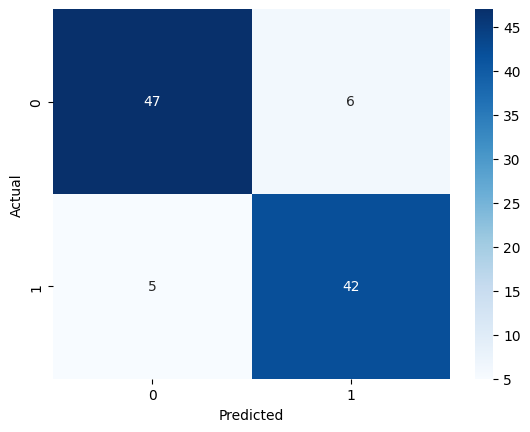

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        53
           1       0.88      0.89      0.88        47

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_true = test_generator.classes
y_pred = (best_model.predict(test_generator) > 0.5).astype(int).flatten()

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_true, y_pred))


Found 100 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


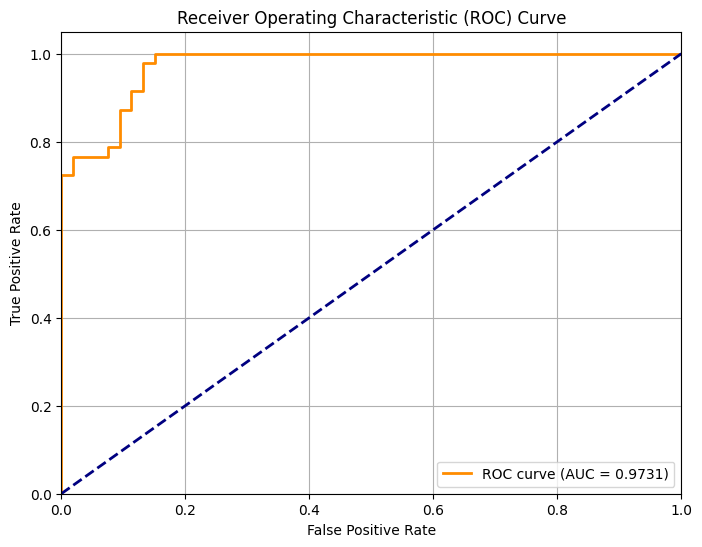

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        53
           1       0.88      0.89      0.88        47

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



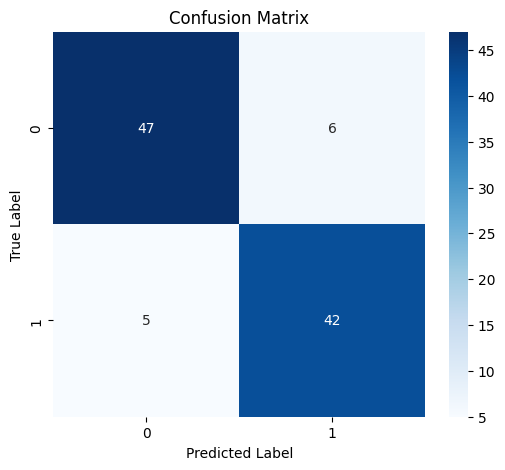

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
model_path = "/content/drive/MyDrive/CNN/best_model.keras"
test_dir = '/content/drive/MyDrive/spectrograms/test'

# Image dimensions and batch size (should match training)
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16

# Load model
model = load_model(model_path)

# Data preprocessing for test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Important for matching predictions with ground truth
)

# Get ground truth and predicted probabilities
y_true = test_generator.classes
y_scores = model.predict(test_generator, verbose=1)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Optional: Classification report and confusion matrix
y_pred = (y_scores > 0.5).astype(int).flatten()
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
filet = h5py.File("/content/drive/MyDrive/signal data/test-data.h5", "r")


In [ ]:
file6 = h5py.File("/content/drive/MyDrive/signal data/benign-single.h5", "r")
file7 = h5py.File("/content/drive/MyDrive/signal data/infected-single.h5", "r")
file8 = h5py.File("/content/drive/MyDrive/signal data/benign-gamesall.h5", "r")
file9 = h5py.File("/content/drive/MyDrive/signal data/infected-gamesall.h5", "r")

In [ ]:
print(len(file7.keys()))

3


# test

In [ ]:
import matplotlib.pyplot as plt
import os
import gc
import scipy.signal as signal  # Ensure signal is properly imported

# Create the new folder if it doesn't exist
output_folder = "/content/drive/MyDrive/spectrograms/infected-single/test/1"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
keys = file7.keys()
for key in list(keys):
    try:
        signal_data = file7[key]  # Load data
        fig = plt.figure()
        plt.psd(signal_data, NFFT=2048, Fc=12e6, Fs=20e6)
        output_filename = os.path.join(output_folder, f"z5noise-{key}.png")
        fig.savefig(output_filename, dpi=300, format="png", bbox_inches="tight")
        plt.close(fig)  # Close figure to release memory

        print(f"Spectrogram for {key} saved to {output_filename}")

        gc.collect()  # Trigger garbage collection

    except Exception as e:
        print(f"Error processing key {key}: {e}")


Spectrogram for infected-idle0 saved to /content/drive/MyDrive/spectrograms/infected-single/test/1/z5noise-infected-idle0.png
Spectrogram for infected-idle1 saved to /content/drive/MyDrive/spectrograms/infected-single/test/1/z5noise-infected-idle1.png
Spectrogram for infected-idle2 saved to /content/drive/MyDrive/spectrograms/infected-single/test/1/z5noise-infected-idle2.png
Spectrogram for infected-idle3 saved to /content/drive/MyDrive/spectrograms/infected-single/test/1/z5noise-infected-idle3.png


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir = '/content/drive/MyDrive/spectrograms/benign-all/test/'

test_datagen = ImageDataGenerator(rescale=1./255)  # Just normalization
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Important if you want to match predictions to filenames
)
#7= 8769

Found 3 images belonging to 1 classes.


In [ ]:
print(y_true)

[0 0 0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


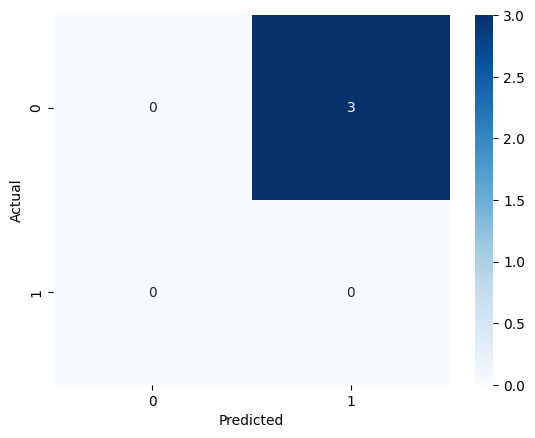

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_true = test_generator.classes
y_pred = (best_model.predict(test_generator) > 0.5).astype(int).flatten()

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_true, y_pred))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir = '/content/drive/MyDrive/spectrograms/infected-all/test/'

test_datagen = ImageDataGenerator(rescale=1./255)  # Just normalization
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Important if you want to match predictions to filenames
)
#7= 8769

Found 3 images belonging to 1 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


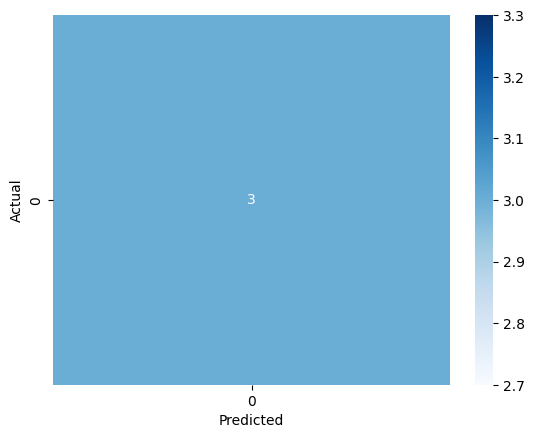

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_true = [1,1,1]
y_pred = (best_model.predict(test_generator) > 0.5).astype(int).flatten()

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_true, y_pred))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir = '/content/drive/MyDrive/spectrograms/benign-single/test/'

test_datagen = ImageDataGenerator(rescale=1./255)  # Just normalization
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Important if you want to match predictions to filenames
)
#7= 8769

Found 5 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


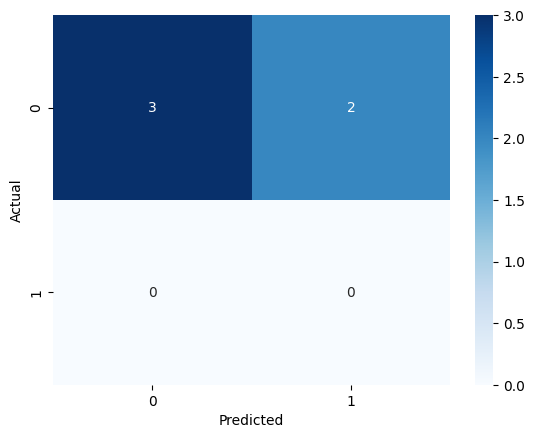

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.00      0.00      0.00         0

    accuracy                           0.60         5
   macro avg       0.50      0.30      0.38         5
weighted avg       1.00      0.60      0.75         5



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_true = test_generator.classes
y_pred = (best_model.predict(test_generator) > 0.5).astype(int).flatten()

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_true, y_pred))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir = '/content/drive/MyDrive/spectrograms/infected-single/test/'

test_datagen = ImageDataGenerator(rescale=1./255)  # Just normalization
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Important if you want to match predictions to filenames
)
#7= 8769

Found 4 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


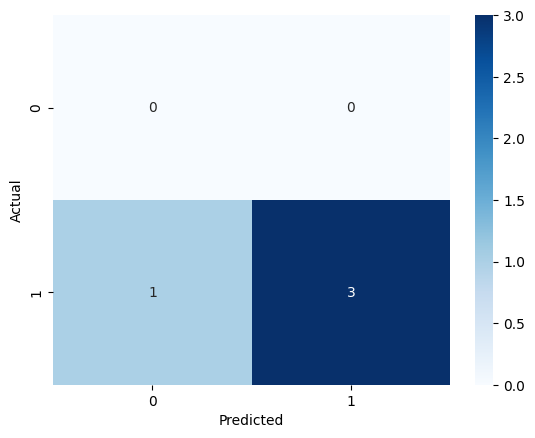

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86         4

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_true = [1,1,1,1]
y_pred = (best_model.predict(test_generator) > 0.5).astype(int).flatten()

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_true, y_pred))


In [ ]:
print(y_true)

[0 0 0 0]
